When comparing the results of Celerite fitting with SDSS or SDSS-PS1 r-band QSO light curves we found that some objects using the  SDSS-PS1 combined date the recovered  timescale is over 10 times longer than that found with Celerite with just SDSS data. In fact,  plotting  

$\log_{10}{\left( \tau_{fit,SDSS-PS1} / \tau_{fit,SDSS}\right)}$  vs  
$\log_{10}{\left( \sigma_{fit,SDSS-PS1} / \sigma_{fit,SDSS} \right)}$

( i.e.  $f_{\tau}$ vs $f_{\sigma}$  ) there are 44 objects out of 8516  for which 

$(f_{\tau}>1) \& ( f_{\sigma}>0.4)$


Some of these exhibit clear SDSS downward or upward trend, that seems to be continued with the PS1 data (eg  dbID 1003694, 123909, 1412379,1446022, 1644710, 1730482, 1299803).

Here we calculate median and $\sigma_{G}$ for the SDSS and PS1 segments of cleaned light curves, and find out if this parameter space allows independendently to find such cases where there is a marked difference between SDSS and PS1 portions of r-band light curve. 




In [3]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.lines as mlines
import os
import pandas as pd 
from astropy.table import Table
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.table import  hstack
from astropy.table import  vstack
from astropy.table import unique
from astropy.table import Column
from astropy.table import join
from matplotlib import rcParams 
import seaborn as sns
rcParams['ytick.labelsize'] = 15
rcParams['xtick.labelsize'] = 15
rcParams['axes.labelsize'] = 20
rcParams['axes.linewidth'] = 2
rcParams['font.size'] = 15
rcParams['axes.titlesize'] = 18

First, plot a few light curves I mentioned above - only the last (fourth) panel, showing the clean SDSS and PS1 data, together with SDSS and SDSS-PS1 results of Celerite fitting ... 

In [215]:
%matplotlib inline
# note  : based on plot_SDSS_PS1_lc()  from Compare_Celerite_Chelsea.... ipynb

# SDSS r-band,  and PS1 DR2 r, no offset 
botRes = Table.read('190606_Celerite_real_Jeff1_Shen2008-2011_s82drw_r.txt', 
                  format='ascii') 
botRes['tauM10'] =  np.power(10, botRes['log10tau']) 
botRes['sigmaM10'] =    botRes['SFinf'] / np.sqrt(2)   

def plot_SDSS_PS1_single(lcname):

    ### final :  plot updated DR2 
    fig,ax = plt.subplots(1,1,figsize=(9,4))
    # the resulting light curves were stored in a new dir : 
    botDircleaning = '../dp2/real_sdss_ps1r_dr2_cleaning/'
    # has all the intermediate data products : 
    # mjd, mag,  magerr, Nobs,  avgmag,  medmag,  avgerr 
    lc = Table.read(botDircleaning+lcname, format='ascii')
    
    colors = ['blue','red']
    labels = ['SDSS r', 'PS1 DR2 r']
    j = 0 
    # plot what is kept in the cleaned light curve  - 
    # sdss, ps1 days with Nobs =1 , which are kept unchanged 
    
    for s in ['sdss','ps1']:
        rows = (lc['survey'] == s ) & (lc['Nobs'] == 1 )
        ax.errorbar(lc['mjd'][rows], lc['mag'][rows], 
                 lc['magerr'][rows], fmt=".", capsize=0.2, label=labels[j],
               c = colors[j])
        j += 1 

    # and with a different color : days for which 
    # Nobs > 1, for which we find  avg mag  and median mag ,
    # but plot only avg mag, since there is not much 
    # difference between that and median mag, 
    # and that's the one that we chose to keep in the 
    # cleaned light curve 
    lc1 = unique(lc[lc['Nobs'] > 1], keys='mjdint')

    # plot the avg err with avg err 
   # plot the avg err with avg err 
    j = 0
    for s in ['sdss','ps1']:
        rows = (lc1['survey'] == s )
        ax.errorbar(lc1['mjd'][rows], lc1['avgmag'][rows], lc1['avgerr'][rows], 
                   fmt="o", capsize=0.2, markersize=8,
                 c = colors[j], mfc='white', mew=2 , label='')
        # markerfacecolor or mfc  = 'white' makes an open circle 
        # markeredgewidth or mew = 2 makes the edge of the circle thicker than default 
        j += 1 
    ax.legend(fontsize=16,loc='upper left', bbox_to_anchor=(1.02,1),
            ncol=1, fancybox=True, shadow=True, )
    
    # place a text box with results
    mrow =  botRes['lcname'] == lcname
    selected = botRes[mrow]
    
    textstr = '\n'.join((
        r'$\tau_{\mathrm{SDSS}}=%.4f$' % (selected['tauEXP_sdss'], ),
        r'$\tau_{\mathrm{SDSS-PS1}}=%.4f$' % (selected['tauEXP_sdss-ps1'],),
        r'$\sigma_{\mathrm{SDSS}}=%.4f$' % (selected['sigmaEXP_sdss'], ),
        r'$\sigma_{\mathrm{SDSS-PS1}}=%.4f$' % (selected['sigmaEXP_sdss-ps1'], ),
                        ))
    # these are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.7)
    ax.text(1.05, 0.5, textstr, transform=ax.transAxes, fontsize=16,
            verticalalignment='top', bbox=props)
    ax.grid()
    ax.invert_yaxis()
    ax.set_xlabel('mjd')
    ax.set_ylabel('mag')
    figname = 'SDSS_PS1_DR2_combined_lc_'+lcname[:-4]+'.png'

    plt.savefig(figname, bbox_inches='tight')
    print('Saved as ', figname)
    plt.show()
    return lc 



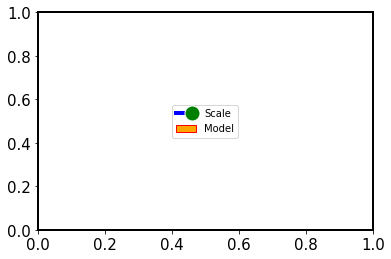

In [212]:
# making custom legend 
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

legend_elements = [(Line2D([0], [0], color='b', lw=4),
                   Line2D([0], [0], marker='o', color='w',
                         markerfacecolor='g', markersize=15)),
                   Patch(facecolor='orange', edgecolor='r',
                         )
                    ]
#[(p1, p2), p3], ['data', 'models']
# Create the figure
from matplotlib.legend_handler import HandlerTuple
fig, ax = plt.subplots()
ax.legend(handles=legend_elements, labels=['Scale' , 'Model'],
          loc='center', handler_map={tuple: HandlerTuple(ndivide=None)})

plt.show()

44 / 8516
Saved as  SDSS_PS1_DR2_combined_lc_1003694.png


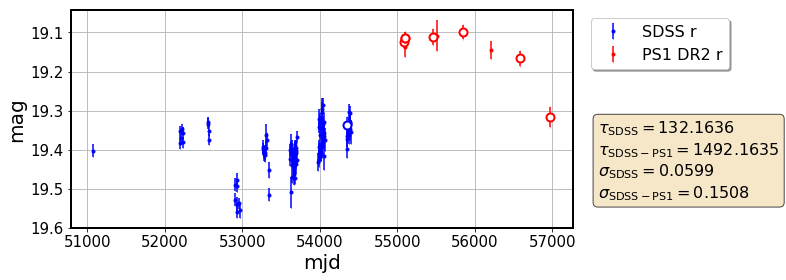

In [216]:
#data = Table.read('190606_Celerite_real_Jeff1.txt', format='ascii')

# select outliers 
x = np.log10(data['sigmaEXP_sdss-ps1'] / data['sigmaEXP_sdss'])
y = np.log10(data['tauEXP_sdss-ps1'] / data['tauEXP_sdss'])

m = (y>1) & (x>0.4)
print(np.sum(m), '/', len(m))

lcnames = data[m]['lcname'].data

for lcname in lcnames[:1]:
    lc = plot_SDSS_PS1_single(lcname)

Ok, now calculate not only median of SDSS and PS1 lcs, but also sigmaG.. 

In [36]:
cleanDir = '../dp2/real_sdss_ps1r_dr2_cleaned/'
# this dir has some LCs where 
# since all PS1 points got flagged as 5 sigma outliers,
# only the SDSS portion is left (eg. dbID = 2092378)
# That's really a minority, but make sure that there is 
# both SDSS and PS1 in the combined 
# cleaned ligth curve to make that comparison 

res = {'lcname' : np.zeros_like(lcnames), 
       'PS1sigmaG' : np.zeros_like(lcnames, dtype=float),
       'PS1median': np.zeros_like(lcnames, dtype=float),
       'SDSSsigmaG': np.zeros_like(lcnames, dtype=float),
       'SDSSmedian': np.zeros_like(lcnames, dtype=float)
       }
i = 0 
for lcname in lcnames : 

    lc = Table.read(cleanDir + lcname, format='ascii')
    res['lcname'][i] = lcname
    # do this check to ensure that a LC has both SDSS 
    # and PS1 part ...  As described above !  
    if np.sum(np.in1d(['sdss','ps1'], np.unique(lc['survey'].data))) > 1 : 
        for survey in ['sdss', 'ps1']:
            m = lc['survey'].data == survey
            x = lc['mag'][m].data
            sigmaG = 0.7413 * (np.percentile(x,75) - np.percentile(x,25))
            res[survey.upper()+'sigmaG'][i] = sigmaG
            res[survey.upper()+'median'][i] = np.median(x)
        i += 1 

In [43]:
summary = Table(res)
m = summary['PS1sigmaG'] == 0 
print('There are ', np.sum(m), ' for which the cleaning \
      process removed all PS1 data' )

summary.remove_rows(m)
summary.write('SDSS_PS1_DR2_cleaned_summary.txt', format='ascii', overwrite=True)

There are  48  for which the cleaning       process removed all PS1 data


Now,  take this summary table and join on dbID with DR7 to get ra, dec. If needed, given ra,dec can crossmatch  with Shen2011  to explore MBH, Lbol, redshift, etc.  (they are present in DR7 DBQSO, but are an older version from Shen2008) 


In [12]:
summary = Table.read('SDSS_PS1_DR2_cleaned_summary.txt', format='ascii') 
summary['dbID'] = [int(x[:-4]) for x in summary['lcname']]

File = '../../CRTS_PROJECT/catalogs_SDSS/DB_QSO_S82.dat'
colnames = ['dbID', 'ra', 'dec', 'SDR5ID', 'M_i', 'M_i_corr', 'redshift',
                   'mass_BH', 'Lbol', 'u', 'g', 'r', 'i', 'z', 'Au']
sdss_dbqso = Table.read(File, format='ascii', names = colnames)

summ = join(summary, sdss_dbqso, keys='dbID')



Also, join the light curve median offsets between SDSS and PS1 with the results of Celerite fits, so we can directly correlate whether outliers in DRW parameters are also outliers in median offsets. 

In [15]:
data = Table.read('190606_Celerite_real_Jeff1.txt', format='ascii')
summ = join(summ, data, keys='lcname')

In [19]:
x = np.log10(summ['sigmaEXP_sdss-ps1'] / summ['sigmaEXP_sdss'])
y = np.log10(summ['tauEXP_sdss-ps1'] / summ['tauEXP_sdss'])
m = (y>1) & (x>0.4)
print(np.sum(m), '/', len(m))
summ[m]['PS1median'] - 


44 / 8468


lcname,PS1sigmaG,PS1median,SDSSsigmaG,SDSSmedian,dbID,ra,dec,SDR5ID,M_i,M_i_corr,redshift,mass_BH,Lbol,u,g,r,i,z,Au,length_sdss,sigmaEXP_sdss,sigmaMAP_sdss,tauEXP_sdss,tauMAP_sdss,length_sdss-ps1,sigmaEXP_sdss-ps1,sigmaMAP_sdss-ps1,tauEXP_sdss-ps1,tauMAP_sdss-ps1
str11,float64,float64,float64,float64,int64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1003694.txt,0.023426894340606283,19.120430547877135,0.0491111250000001,19.396,1003694,20.309139,-1.053009,3067,-26.285,-26.622,1.8928,8.961,46.578,19.444,19.387,19.341,19.032,18.917,0.204,3321.0338459999984,0.05992165575003788,0.054034809545021247,132.1635529256881,67.25878533336956,5890.013739099995,0.1508471031315043,0.12607102808098666,1492.163497343035,792.9020598108034
1124333.txt,0.11651577973373273,20.118233968922656,0.04169812499999894,19.8365,1124333,337.32605,-0.667659,74526,-24.496,-24.779,1.1626,8.677,45.801,20.243,20.115,19.775,19.731,19.974,0.347,2934.938688000002,0.054530357389015745,0.049578691591237255,38.24256384821139,11.96514951517627,5054.1875162,0.1475557997392836,0.12939133435170513,600.6115083994748,269.3910895400171
123909.txt,0.10747569523956114,20.48146572800598,0.05374425000000116,20.194499999999998,123909,4.110588,0.609013,587,-26.398,-26.744,3.2262,0.0,0.0,23.049,20.61,20.305,20.083,20.099,0.118,3321.0339959999983,0.0440324407124872,0.03892609863320452,84.59344148686787,24.446567578132278,5506.0793299,0.18107774794462045,0.14862677785045558,2128.709898573251,1112.0823342299614
1299803.txt,0.02147960685751736,18.519402162508925,0.02464822500000181,18.375500000000002,1299803,25.763449,-0.73168,3954,-24.055,-24.472,0.5268,8.506,45.77,18.758,18.433,18.4,18.172,18.169,0.145,3321.0338439999978,0.021489258759570952,0.02,17.656544294025018,0.09999999999999998,5890.002575899998,0.07072569521266847,0.0590007064785878,1996.8901843096437,1088.4446230847145
1378415.txt,0.1199915488140548,20.015130609238827,0.055782825000000355,20.247500000000002,1378415,333.447205,0.32457,74020,-25.739,-26.253,2.305,8.54,46.381,20.904,20.37,20.291,20.053,19.668,0.265,2947.9454909999986,0.04252093163101083,0.038713030400019284,125.47601501185633,41.239804086492235,5057.3015075,0.14086464056544867,0.11615965624708707,1532.42766438455,760.8197699226507
1412379.txt,0.17138210702937146,20.043635508298614,0.11397487500000168,19.433500000000002,1412379,334.631622,-0.763599,74161,-25.221,-25.418,1.2328,9.447,46.16,19.685,19.62,19.224,19.192,19.341,0.462,2934.9386899999954,0.11253612312091454,0.09957976885032066,105.92950484252148,49.32754544085543,5054.207217499999,0.342778273825753,0.28283261258447134,1711.3004719475791,838.2908398448943
1446022.txt,0.08013083735462131,19.340764640568082,0.04151279999999806,19.512,1446022,331.39679,0.132321,73731,-25.994,-26.143,1.6914,9.292,46.484,19.843,19.641,19.419,19.129,19.161,0.371,2934.938734000003,0.04261952379320296,0.041404427674286114,4.724547301613056,0.09999999999999998,5054.2099665999995,0.1299091777660015,0.11985085483283538,452.107376805033,189.7722065273855
1644710.txt,0.047491881231190025,19.695700487605087,0.06968220000000089,19.418,1644710,33.245827,-0.097257,5138,-23.957,-24.529,0.8127,8.638,45.638,20.407,19.775,19.435,19.33,19.071,0.162,3336.9561269999977,0.08048945055931078,0.07221399528916472,88.84759960456114,47.103594257777075,5912.905862300002,0.20555160617919327,0.173822924784886,923.6463242828372,424.10995182832215
1730482.txt,0.11378529030038,19.565100258243334,0.10897110000000149,20.2295,1730482,33.870953,-0.887472,5247,-24.435,-24.603,1.3632,8.822,45.978,20.56,20.549,20.144,20.104,20.166,0.181,3336.9561290000056,0.10422972316827797,0.09946861904536738,9.139646313361377,5.969793231352173,5912.942583100004,0.36961812059006827,0.3375480067884479,399.6632670535442,234.74972380635253


Now plot the histograms  ( all for combined r-band cleaned light curves , after sigma-clipping and day-averaging ) 

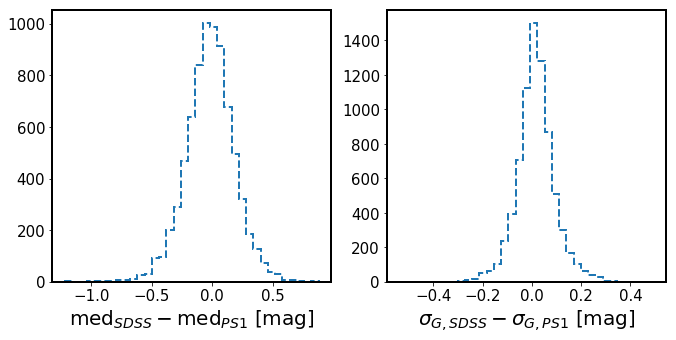

In [74]:
fig,ax = plt.subplots(1,2, figsize=(11,5))

m = summ['SDSSmedian'] < 20.5

#ax[0].hist(summ['SDSSmedian'] - summ['PS1median'], ls='--', histtype='step',
#          lw=2, bins=35) # the distributions are so similar, 
# not worth comparing ... 
ax[0].hist(summ['SDSSmedian'][m] - summ['PS1median'][m], ls='--', histtype='step',
          lw=2, bins=35)
ax[0].set_xlabel(r'$\mathrm{med}_{SDSS}-\mathrm{med}_{PS1}$ [mag]')
ax[1].hist(summ['SDSSsigmaG'][m] - summ['PS1sigmaG'][m] , ls='--', histtype='step',
          lw=2,bins=35)
ax[1].set_xlabel(r'$\sigma_{G,SDSS}-\sigma_{G,PS1}$ [mag]')
plt.savefig('SDSS_PS1_DR2_cleaned_offsets.png', bbox_inches='tight', dpi=100)

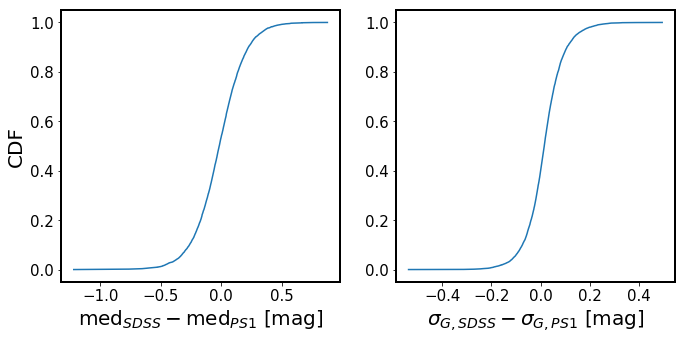

In [73]:
#### using "exact" empirical CDF 
#### based on https://stackoverflow.com/questions/10640759/how-to-get-the-cumulative-distribution-function-with-numpy 
m = summ['SDSSmedian'] < 20.5

fig,ax = plt.subplots(1,2, figsize=(11,5))
Z = summ['SDSSmedian'][m] - summ['PS1median'][m]
N = len(Z)
X2 = np.sort(Z)
F2 = np.array(range(N))/float(N)
ax[0].plot(X2, F2)
ax[0].set_ylabel('CDF')
ax[0].set_xlabel(r'$\mathrm{med}_{SDSS}-\mathrm{med}_{PS1}$ [mag]')

Z = summ['SDSSsigmaG'][m] - summ['PS1sigmaG'][m]
N = len(Z)
X2 = np.sort(Z)
F2 = np.array(range(N))/float(N)
ax[1].plot(X2, F2)
ax[1].set_xlabel(r'$\sigma_{G,SDSS}-\sigma_{G,PS1}$ [mag]')
plt.savefig('SDSS_PS1_DR2_cleaned_offsets_CDF.png', bbox_inches='tight', dpi=100)

In [69]:
len(Z)

8388

How many outliers are there ?

In [76]:
m1 = summ['SDSSmedian'].data < 21
m2 = np.abs(summ['SDSSmedian'].data- summ['PS1median'].data)>0.7
m = m1&m2 
print(np.sum(m), np.sum(m1))
summ[m]

33 8388


lcname,PS1sigmaG,PS1median,SDSSsigmaG,SDSSmedian,dbID,ra,dec,SDR5ID,M_i,M_i_corr,redshift,mass_BH,Lbol,u,g,r,i,z,Au
str11,float64,float64,float64,float64,int64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
223800.txt,0.03898157367989151,19.65622585069613,0.1994097000000014,18.908,223800,14.944415,0.048633,2332,-24.001,-24.288,0.6819,8.54,45.628,19.059,18.845,18.921,18.853,18.919,0.145
293690.txt,0.12521039895587271,21.071011628288204,0.063010499999998,20.301499999999997,293690,351.351685,-0.776233,76175,-23.791,-24.581,1.0823,0.0,0.0,20.691,20.638,20.219,20.215,20.107,0.226
338888.txt,0.3096556890682541,20.771445981286966,0.07190609999999834,19.852,338888,354.722717,-1.022067,76670,-25.186,-25.59,1.4879,9.143,46.119,20.536,20.223,19.795,19.555,19.587,0.169
580228.txt,0.25431449171705656,20.895851852995886,0.3454458000000008,20.16,580228,16.810339,-0.835196,2576,-22.502,-23.422,0.6512,8.012,45.378,21.106,20.766,20.577,20.276,20.036,0.235
720083.txt,0.23240393163715117,20.565763463155985,0.2029308749999998,19.7915,720083,340.627441,-0.133563,74915,-23.635,-23.507,0.8998,7.941,44.878,20.18,20.044,19.96,19.967,19.755,0.328
861520.txt,0.10184576227505235,20.883546153370055,0.2601962999999993,19.882,861520,342.350067,0.797352,75111,-24.554,-24.733,1.35,0.0,0.0,20.863,20.867,20.163,20.102,20.25,0.526
1042657.txt,0.17859642696675848,20.125389698693507,0.07413000000000106,19.318,1042657,337.151001,-0.534157,74503,-24.701,-25.364,1.0347,0.0,0.0,20.001,19.701,19.264,19.258,19.403,0.378
1108089.txt,0.14155704003039488,19.749944402104703,0.185880975,20.4955,1108089,338.543762,0.702794,74670,-22.88,-23.783,0.7801,0.0,0.0,21.489,20.751,20.531,20.422,20.054,0.443
1177097.txt,0.3832427916107877,20.73343024812948,0.1328780250000024,19.9815,1177097,335.486664,0.578915,74269,-25.229,-25.584,1.7299,0.0,0.0,20.598,20.367,20.276,19.938,19.936,0.35


Plot these light curves : 
    
    

Saved as  SDSS_PS1_DR2_combined_lc_338888.png


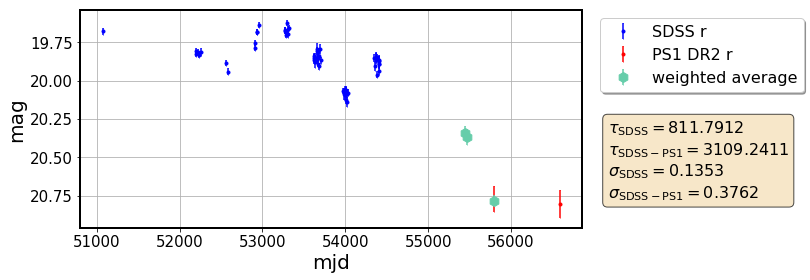

Saved as  SDSS_PS1_DR2_combined_lc_861520.png


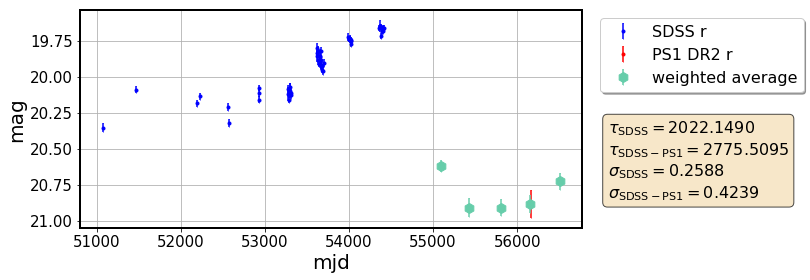

Saved as  SDSS_PS1_DR2_combined_lc_1042657.png


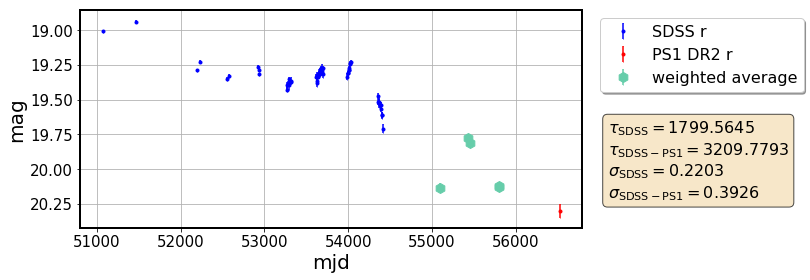

Saved as  SDSS_PS1_DR2_combined_lc_1475410.png


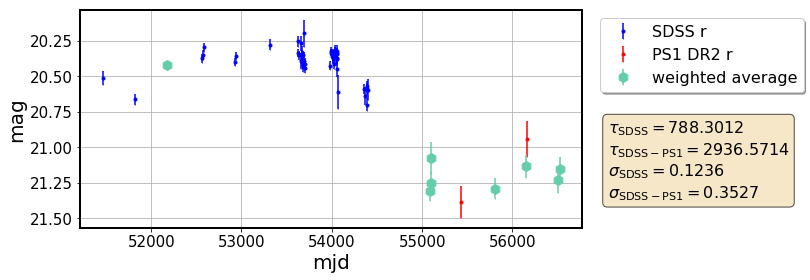

Saved as  SDSS_PS1_DR2_combined_lc_1696259.png


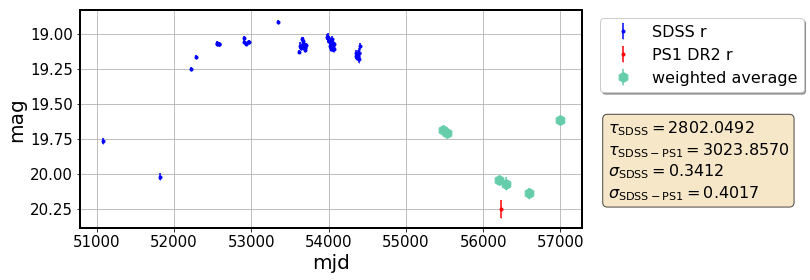

In [65]:
lcnames = summ[m]['lcname']
for lcname in lcnames[:5]:
    lc = plot_SDSS_PS1_single(lcname)

Compare the overlap between the outliers in  $\tau$-$\sigma$ space vs  those of median magnitude offsets... 

Mark the region in $\tau$ - $\sigma$ space occupied by the outliers. Store their names ...

8516  of  8516
Saved as  Compare_Celerite_SDSS-PS1_vs_SDSS_EXP_190606.png


/Users/chris/GradResearch/Paper2_SDSS_PTF_PS1/code2/modules.py:97: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  hist_y, bins_y = np.histogram(y, bins=33, normed=True, range=extent[2:])
/Users/chris/GradResearch/Paper2_SDSS_PTF_PS1/code2/modules.py:107: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  hist_x, bins_x = np.histogram(x, bins=33, normed=True, range=extent[:2])


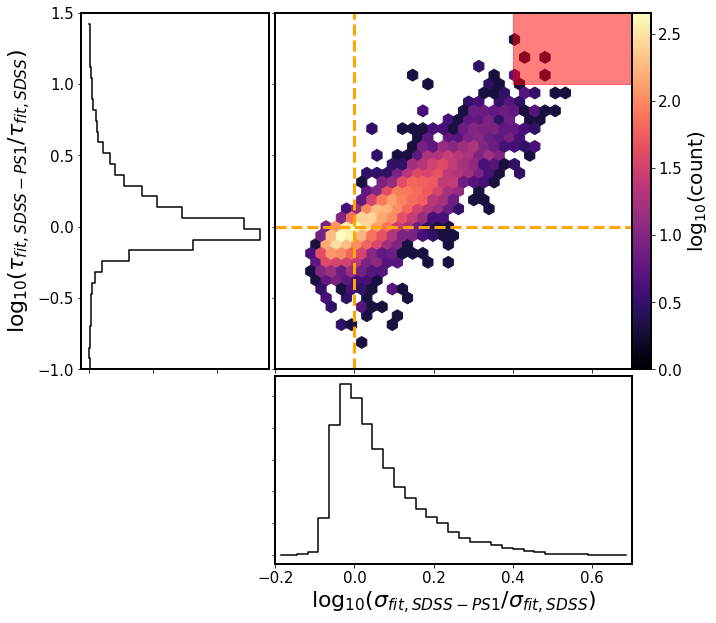

In [11]:
%matplotlib inline
import modules as mod
import imp
imp.reload(mod)
fname  = '190606_Celerite_real_Jeff1.txt'
data = Table.read(fname, format='ascii')
x = np.log10(data['sigmaEXP_sdss-ps1'] / data['sigmaEXP_sdss'])
y = np.log10(data['tauEXP_sdss-ps1'] / data['tauEXP_sdss'])
m_ratio = (y>1) & (x>0.4)
data[m_ratio]

mod.plot_tau_sigma_ratios(data, rectangle=[0.4, 1, 0.5, 0.5])

Color by the median offsets...

8468  of  8468


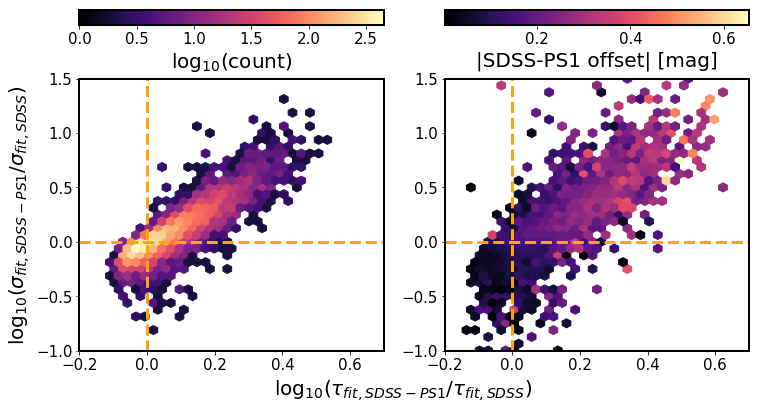

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt 
import matplotlib.patches as patches
import matplotlib as mpl
# the Celerite results 
fname  = '190606_Celerite_real_Jeff1.txt'
data_cel = Table.read(fname, format='ascii')

# the SDSS-PS1 offsets
summary = Table.read('SDSS_PS1_DR2_cleaned_summary.txt', format='ascii') 

# join on lcname
data = join(data_cel, summary, keys = 'lcname')

# an obvious cut, if nothing more stringent needed ... 
m5 = data['tauMAP_sdss-ps1'] > 0 
m = m5 #&m3&m4&m5
print(np.sum(m), ' of ', len(m))

x = np.log10(data['sigmaEXP_sdss-ps1'][m] / data['sigmaEXP_sdss'][m] )
y = np.log10(data['tauEXP_sdss-ps1'][m]  / data['tauEXP_sdss'][m] )
z = np.abs(data['PS1median'][m] - data['SDSSmedian'][m])

extent = [-0.2, 0.7, -1., 1.5 ]

xmin,xmax = extent[0], extent[1]
ymin,ymax = extent[2], extent[3]

fig,ax = plt.subplots(1,2,figsize=(12,5))

# left axis : color by count 
image = ax[0].hexbin(x, y, extent = extent, gridsize=35, 
      bins='log', vmin=1 , mincnt=2, cmap='magma')

# set bottom and height for both colorbars
bottom, height =  1.03, 0.04

# get left and right coordinates in figure units 
# for left axis 
l,b,w,h = ax[0].get_position().bounds
cax = fig.add_axes([l,bottom,w,height])

vmin, vmax = image.get_clim()
norm = mpl.colors.Normalize(vmin=np.log10(vmin), vmax=np.log10(vmax))
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=image.get_cmap())
cmap.set_array([])
    
plt.colorbar(mappable = cmap, cax = cax, orientation='horizontal',
                label=r'$\log_{10}{(\mathrm{count})}$')

ax[0].axvline(0,ls=ls,lw=lw,c=c)
ax[0].axhline(0,ls=ls,lw=lw,c=c)
ax[0].set_xlim(xmin,xmax)
ax[0].set_ylim(ymin,ymax)

string = r'$\log_{10}{\left( \sigma_{fit, %s} / \sigma_{fit,%s} \right)}$'%('SDSS-PS1','SDSS')
ax[0].set_ylabel(string)

# right axis:  color by median SDSS-PS1 r-band offset ...
image = ax[1].hexbin(x, y, z, extent = extent, gridsize=35, 
     cmap='magma')

# get left and right coordinates in figure units 
# for right axis 
l,b,w,h = ax[1].get_position().bounds
cax = fig.add_axes([l,bottom,w,height])

vmin, vmax = image.get_clim()
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=image.get_cmap())
cmap.set_array([])
    
plt.colorbar(mappable = image, cax = cax, orientation='horizontal',
                label='|SDSS-PS1 offset| [mag]')

ax[1].axvline(0,ls=ls,lw=lw,c=c)
ax[1].axhline(0,ls=ls,lw=lw,c=c)
ax[1].set_xlim(xmin,xmax)
ax[1].set_ylim(ymin,ymax)

s= r'$\log_{10}{\left( \tau_{fit, %s} / \tau_{fit,%s} \right)}$'%('SDSS-PS1','SDSS')
fig.text(0.35,0.0, s, fontsize=20)

plt.savefig('190606_DRW_param_ratios_and_mag_offsets.png', 
            bbox_inches='tight')

In [31]:
z

0.025448144687096885
-0.10734013043154178
0.025728621289829334
0.15803281798317315
0.005689966801330826
0.04550565448136368
-0.13306199324489398
-0.14285320762087395
0.2640997249772603
0.005354121713683213
-0.15857111510221245


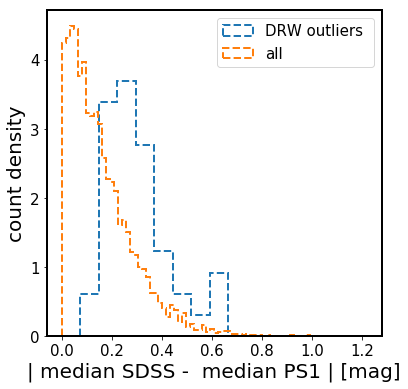

In [96]:
x = np.log10(data['sigmaEXP_sdss-ps1'] / data['sigmaEXP_sdss'])
y = np.log10(data['tauEXP_sdss-ps1'] / data['tauEXP_sdss'])
m =  (y>1) & (x>0.4)

fig,ax = plt.subplots(1,1,figsize=(6,6))
off = np.abs(data['SDSSmedian']-data['PS1median'])

ax.hist(off[m], histtype='step', 
       ls='--', lw=2, label='DRW outliers ', density=True, bins='auto')
ax.hist(off,   histtype='step', 
       ls='--', lw=2, label='all', density=True,bins='auto')
ax.set_xlabel('| median SDSS -  median PS1 | [mag]')
ax.set_ylabel('count density')
ax.legend(fontsize=15)
plt.savefig('DRW_outliers_in_median_offset_space.png', bbox_inches='tight')

Include median magnitude cutoff...  Plot as subpanels   - 4 pages of 2x5 plots 

Combine all info we have :
    * Celerite results
    * DR5 DBQSO  (Shen2008)
    * DR7 DBQSO (Shen2011)
    

In [231]:
# Celerite results 
fname  = '190606_Celerite_real_Jeff1.txt'
data_cel = Table.read(fname, format='ascii')

# the SDSS-PS1 offsets
summary = Table.read('SDSS_PS1_DR2_cleaned_summary.txt', format='ascii') 

# join on lcname
data = join(data_cel, summary, keys = 'lcname')

# add a column with int  DR7  dbID  for SDSS QSO 
dbID = np.asarray([x[:-4] for x in data['lcname']]).astype(int)
data['dbID']  = dbID

# add the info about qso from DR5 catalog to have ra, dec 
#  SDSS s82r  9258  DR5 QSOs from Shen+2008
# from http://faculty.washington.edu/ivezic/macleod/qso_dr7/Southern.html
File = '../../CRTS_PROJECT/catalogs_SDSS/DB_QSO_s82.dat'
colnames = ['dbID', 'ra', 'dec', 'SDR5ID', 'M_i', 'M_i_corr', 'redshift',
                   'mass_BH', 'Lbol', 'u', 'g', 'r', 'i', 'z', 'Au']
dr5 = Table.read(File, format='ascii', names = colnames)
data_dr5 = join(data, dr5, keys='dbID')

# read in Shen+2011 to add to the resutls ....
dr7_all = Table.read("../code/dr7_bh_May_2011.fits", format='fits')

# select only those in S82  by dec cutoff, and choose relevant columns 
dr7 = dr7_all[abs(dr7_all['DEC']) < 1.5]['SDSS_NAME', 'RA', 'DEC', 'REDSHIFT', 
        'LOGLBOL', 'LOGBH', 'LOGBH_ERR', 'LOGEDD_RATIO','MI_Z2' ]

cat1 = SkyCoord(ra=data_dr5['ra']*u.degree, 
                dec=data_dr5['dec']*u.degree)
cat2 = SkyCoord(ra=dr7['RA']*u.degree,
                dec=dr7['DEC']*u.degree, 
                       frame='icrs') 

idx, sep2d, dist3d = cat1.match_to_catalog_sky(cat2) 
# Celerite x-matched to Shen2008 (DBQSO) and Shen2011 - all catalogs 
data_dr5_7 = hstack([data_dr5, dr7[idx]])
name = fname[:-4]+'_dr5_7.txt'
data_dr5_7.write(name, format='ascii', overwrite=True)
print('Added to Celerite DBQSO and Shen2011. Saved as ', name)

Added to Celerite DBQSO and Shen2011. Saved as  190606_Celerite_real_Jeff1_dr5_7.txt


In [232]:
%matplotlib inline

data = Table.read(name, format='ascii')

# select DRW outliers 
x = np.log10(data['sigmaEXP_sdss-ps1'] / data['sigmaEXP_sdss'])
y = np.log10(data['tauEXP_sdss-ps1'] / data['tauEXP_sdss'])
m1 =  (y>1) & (x>0.4)

# add magnitude cutoff
m2  = data['SDSSmedian']  < 20.5 

# combined masks 
m = m1 & m2
print(np.sum(m))

# store the subset with 38 candidates... 
data.rename_column('SDSS_NAME', 'SDSSJID')
data_clqso = data[m].copy()

# split the table of 38 outliers into four sub arrays :
#x = np.arange(1,39)
#xs = np.array_split(x,4)
#ds  = np.array_split(data[m],4)
ds = [data[m][:10] , data[m][10:20] , data[m][20:30], data[m][30:] ]


38


In [219]:
def print_lc_page(ds, page):
    #ylims_dic =  {'min':np.zeros(10), 'max':np.zeros(10) , 'span' : np.zeros(10) }
    fig,axs = plt.subplots(5,2,figsize=(18,20))
    ax = np.ravel(axs)
    for i in range(len(ds[page])): 
        lcname = ds[page]['lcname'][i]
        # plot the combined sdss - ps1 light curve, during cleaning, but 
        # before day - averaging ... 
        botDircleaning = '../dp2/real_sdss_ps1r_dr2_cleaning/'
        # has all the intermediate data products : 
        # mjd, mag,  magerr, Nobs,  avgmag,  medmag,  avgerr 
        lc = Table.read(botDircleaning+lcname, format='ascii')

        colors = ['blue','red']
        labels = ['SDSS r', 'PS1 DR2 r']
        j = 0 
        # plot what is kept in the cleaned light curve  - 
        # sdss, ps1 days with Nobs =1 , which are kept unchanged 
        for s in ['sdss','ps1']:
            rows = (lc['survey'] == s ) & (lc['Nobs'] == 1 )
            ax[i].errorbar(lc['mjd'][rows], lc['mag'][rows], 
                     lc['magerr'][rows], fmt=".", capsize=0.2, label=labels[j],
                   c = colors[j])
            j += 1 

        # and with a different color : days for which 
        # Nobs > 1, for which we find  avg mag  and median mag ,
        # but plot only avg mag, since there is not much 
        # difference between that and median mag, 
        # and that's the one that we chose to keep in the 
        # cleaned light curve 
        lc1 = unique(lc[lc['Nobs'] > 1], keys='mjdint')

          # plot the avg err with avg err 
        j = 0
        for s in ['sdss','ps1']:
            rows = (lc1['survey'] == s )
            ax[i].errorbar(lc1['mjd'][rows], lc1['avgmag'][rows], lc1['avgerr'][rows], 
                       fmt="o", capsize=0.2, markersize=8,
                     c = colors[j], mfc='white', mew=2 , label='')
            # markerfacecolor or mfc  = 'white' makes an open circle 
            # markeredgewidth or mew = 2 makes the edge of the circle thicker than default 
            j += 1 
            
        ax[i].set_title('dbID='+lcname[:-4])

        ylim = ax[i].get_ylim()
        ymin, ymax =  min(ylim), max(ylim)
        span = ymax - ymin
        #ylims_dic['min'][i] = ymin
        #ylims_dic['max'][i] = ymax
        #ylims_dic['span'][i] = span 

        # increase the vertical span by  0.5 mag  if 
        # less than 0.5 .... 
        min_span = 0.5
        if span  < min_span : 
            ymin_new = ymin - min_span / 2.
            ymax_new = ymax + min_span / 2.
            ax[i].set_ylim(ymin_new, ymax_new)

        ax[i].invert_yaxis()
        
    if len(ds[page]) < 10 :
        for i in range(len(ds[page]),10) :
            ax[i].axis('off')
        
    # set the same span for all panels , equal to the 
    # largest span in a light curve on that page ... 
    # span = max(ylims_dic['span'])
    # for i in range(10):
    #     ymed = ylims_dic['min'][i] + ylims_dic['span'][i] / 2.
    #     ymin_new = ymed - span/2.
    #     ymax_new = ymed + span/2.
    #     ax[i].set_ylim(ymin_new,ymax_new)

    fig.subplots_adjust(hspace=0.3)
    plt.savefig('SDSS_PS1_outliers_page_'+str(page)+'.png', bbox_inches='tight',
               dpi=100)


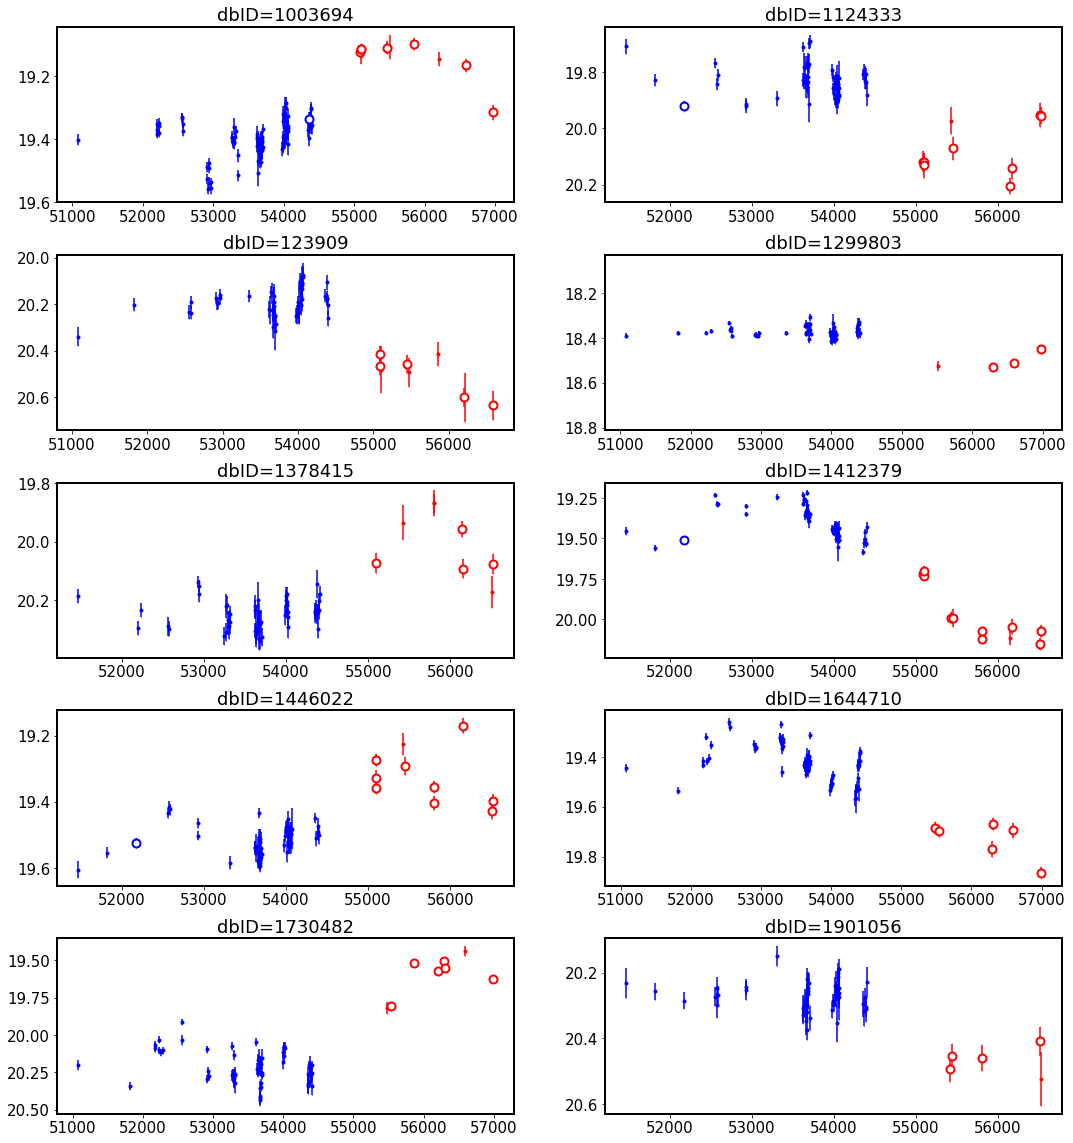

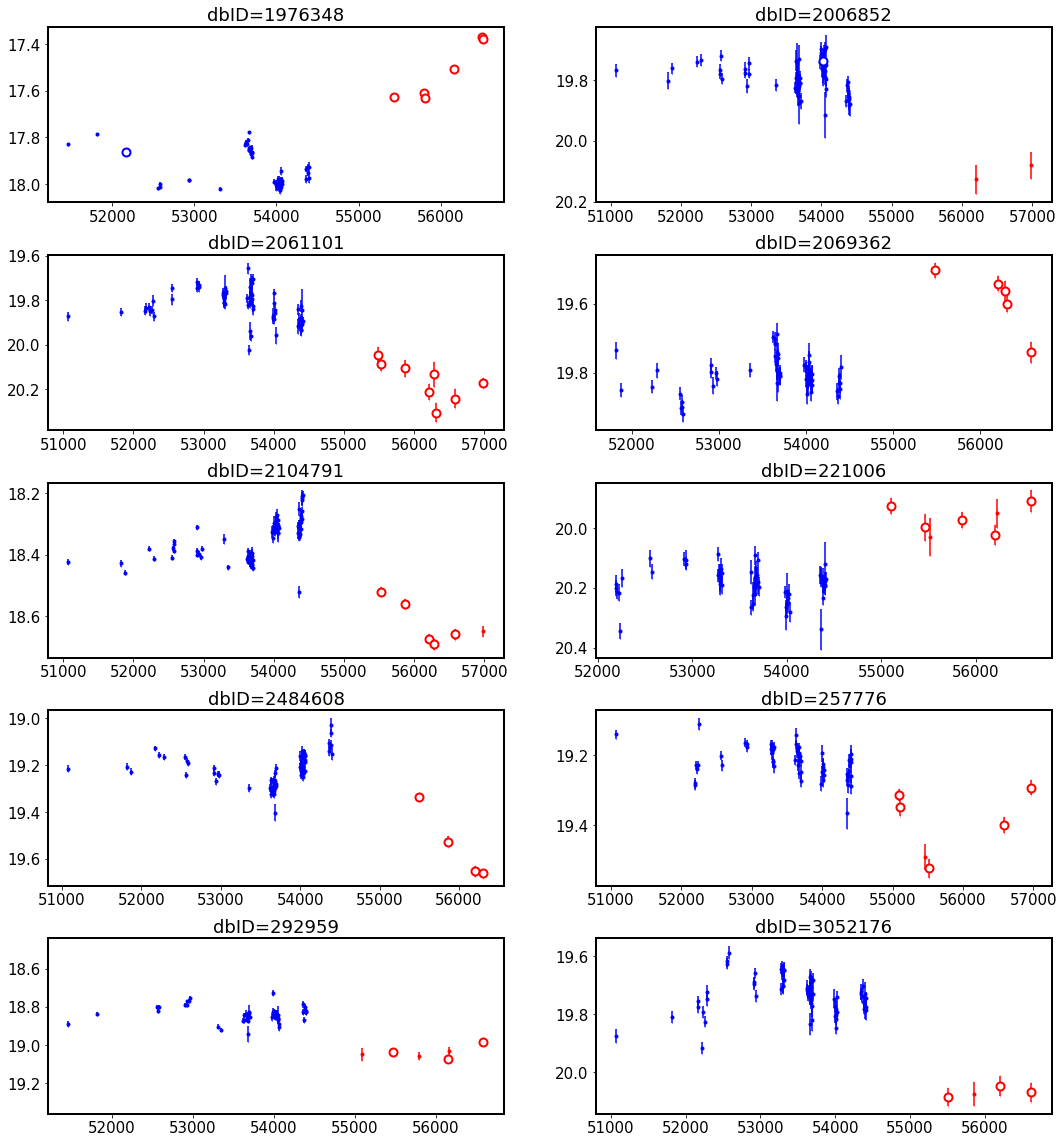

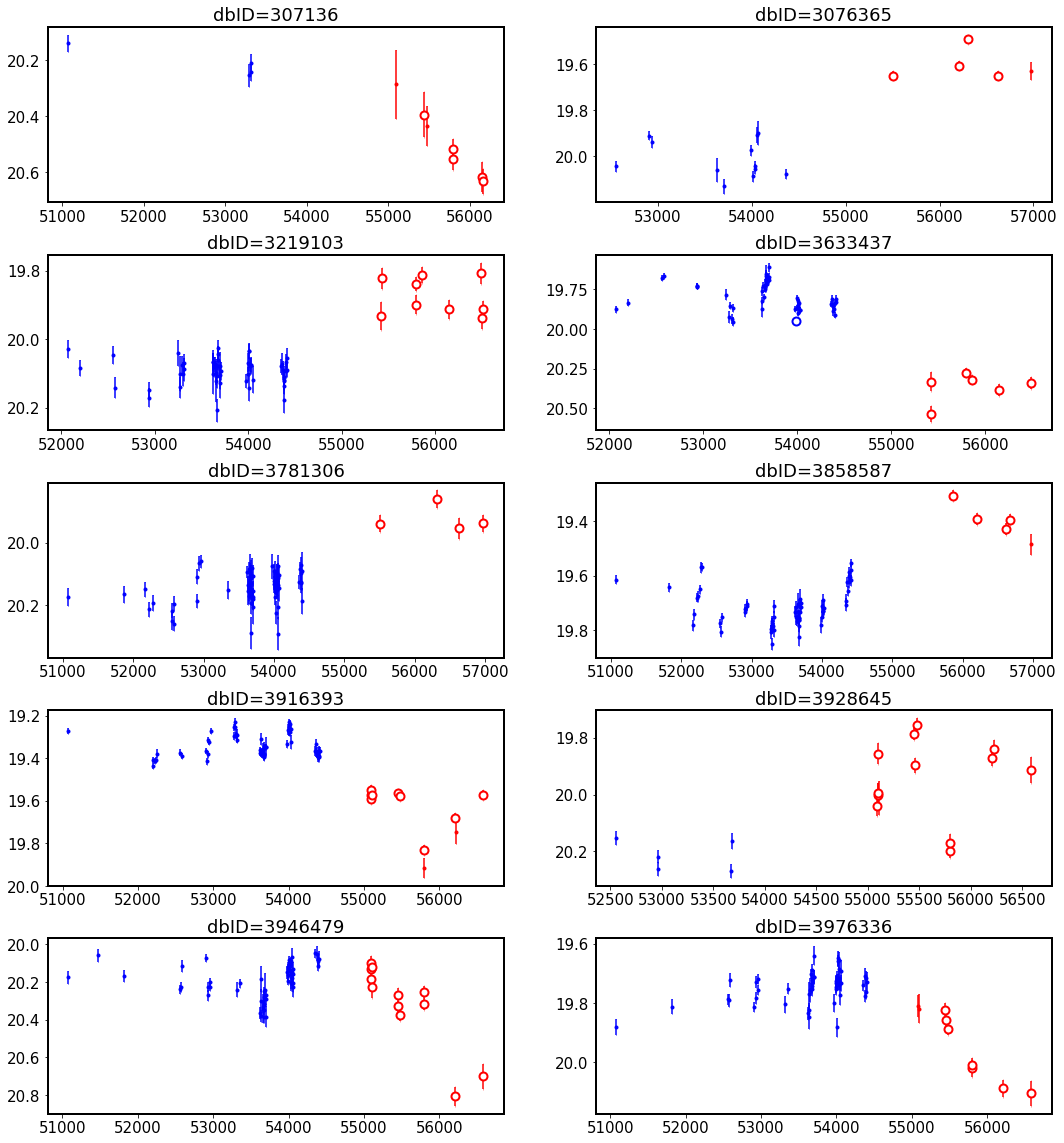

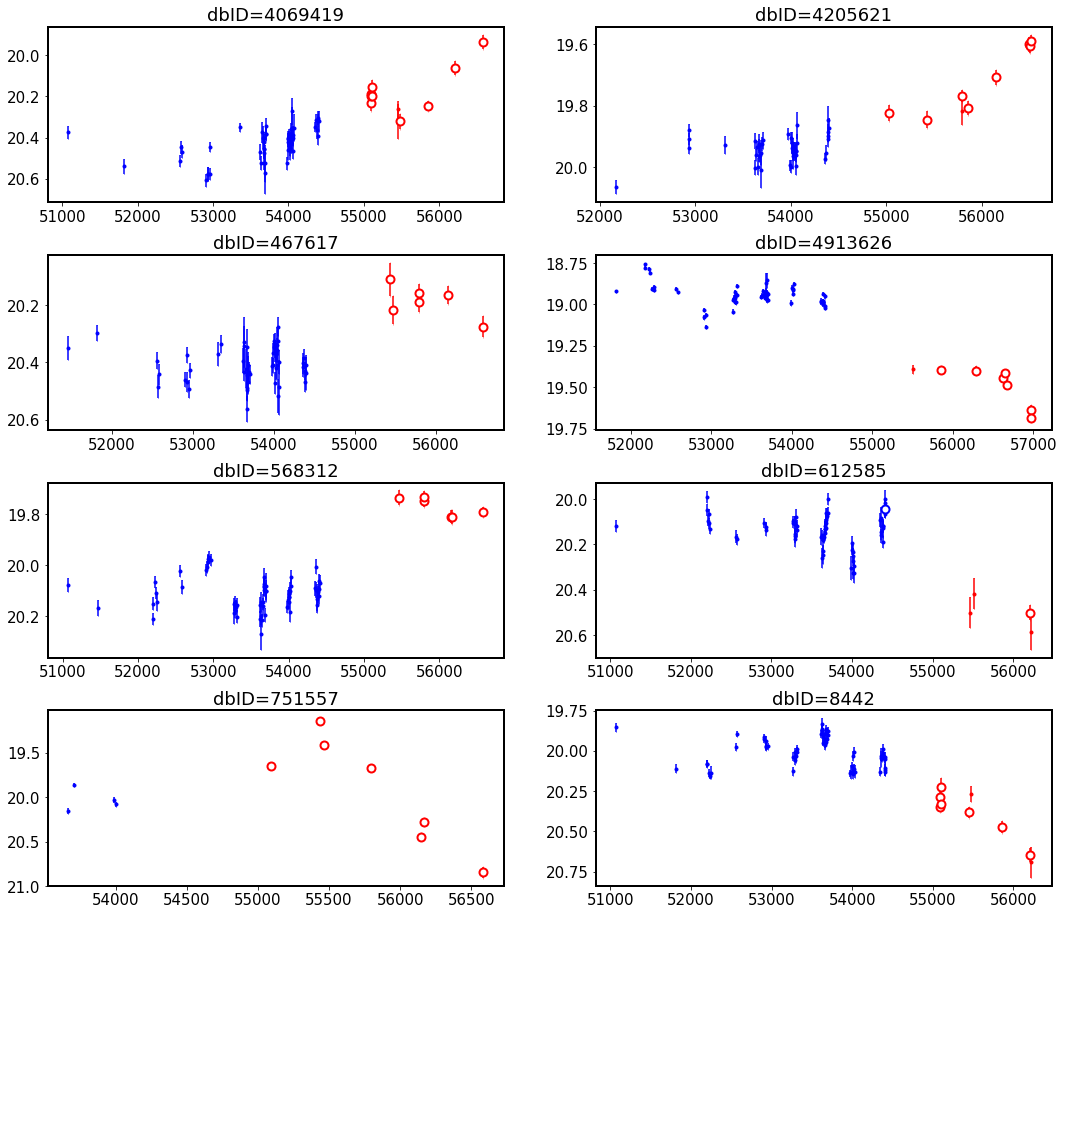

In [220]:
# iterate over 4 pages ,  2x5 light curves per page 
for page in range(len(ds)) : 
    print_lc_page(ds, page)

In [235]:
# store the info about the 38 candidates 
data_clqso[['dbID', 'ra','dec', 'REDSHIFT', 'LOGLBOL', 
            'LOGBH', 'LOGEDD_RATIO']].write('CLQSO_S82_38_candidates.txt',
                                            format='ascii')

Check out Chelsea's  data for these QSO ... Her X-ray data could be useful - but while she's on vacations, check out Stephanie LaMassa  S82X  catalog .... 

In [ ]:
First, read in the tab2.txt from MAcLeod+2019 

In [307]:
tab2 = Table.read('tab2.txt', names = ['SDSSJID','z', 'morph.flag', 'Phot.MJD_1',
'g_1' , 'sigma_1' , 'Phot.MJD_2', 'g_2', 'sigma_2' , 'Spec.MJD_1', 
'MJD(PS1)',  'g_PS1', 'sigma_PS1',  'Spec.MJD_2', 'Facility', 'CLQbyVI?', 
                                      'N_sigma(Hbeta)'],   format='ascii')

In [309]:
np.in1d(data_clqso['SDSSJID'].data,  tab2['SDSSJID'].data )

array([False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [310]:
data_clqso_tab2  = join(data_clqso, tab2, keys='SDSSJID')

In [312]:
data_clqso_tab2

lcname,length_sdss,sigmaEXP_sdss,sigmaMAP_sdss,tauEXP_sdss,tauMAP_sdss,length_sdss-ps1,sigmaEXP_sdss-ps1,sigmaMAP_sdss-ps1,tauEXP_sdss-ps1,tauMAP_sdss-ps1,PS1sigmaG,PS1median,SDSSsigmaG,SDSSmedian,dbID,ra,dec,SDR5ID,M_i,M_i_corr,redshift,mass_BH,Lbol,u,g,r,i,z_1,Au,SDSSJID,RA,DEC,REDSHIFT,LOGLBOL,LOGBH,LOGBH_ERR,LOGEDD_RATIO,MI_Z2,z_2,morph.flag,Phot.MJD_1,g_1,sigma_1,Phot.MJD_2,g_2,sigma_2,Spec.MJD_1,MJD(PS1),g_PS1,sigma_PS1,Spec.MJD_2,Facility,CLQbyVI?,N_sigma(Hbeta)
str11,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str18,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,int64,float64,float64,int64,int64,float64,float64,int64,str8,int64,float64
751557.txt,332.0341600000029,0.13189540957061696,0.09421540070824395,7.6794103981489314,0.09999999999999998,2918.1116526999976,0.4728961823435043,0.4378389334915244,306.6854273674961,0.09999999999999998,0.6168260291426754,19.668917131040367,0.08061637499999778,20.057499999999997,751557,343.168213,1.166308,75199,-22.552,-22.857,0.5339,0.0,0.0,20.979,20.382,20.312,19.813,19.648,0.408,225240.37+010958.7,343.1682434082031,1.1663060188293457,0.5335999727249146,45.31824592746787,8.87780333233864,0.1719575736913289,-1.6599279499883366,-23.00210046367719,0.534,0,51464,21.271,0.054,55446,19.207,0.02,55500,56575,21.001,0.082,57598,Magellan,1,3.7


Saved as  SDSS_PS1_DR2_combined_lc_751557.png


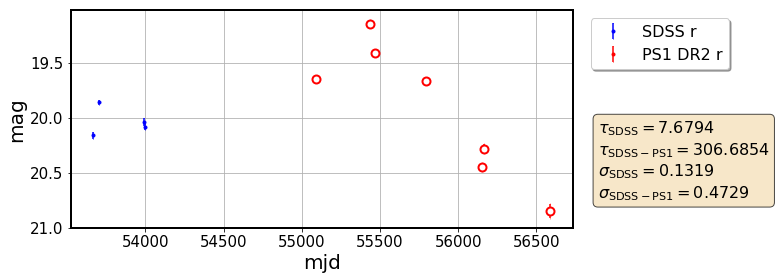

In [247]:
lc = plot_SDSS_PS1_single('751557.txt')

Only this QSO appears in Chelsea's list. Let's check against the other list : 

In [315]:
a = 'SDSSJID, ra, dec, z, morph_flag,  mjd1, g1, ge1, mjd2, g2, ge2, Nspec, MJDlast_spec, MJDlast_phot, g_last_phot, ge_last_phot, obsflag, FESflag, FEStargflag, Nicflag, Ianflag, CLQflag, Selection, Priority, Observatory, MJDfollowup1, MJDfollowup2, CSSflag, robustflag, radioflag, reobs, rebright'
b = a.split(sep=',')
c = [x.strip() for x in b] 
clqcans = Table.read('clqcans.dat', names = c, format='ascii')
data_clqcans  = join(data_clqso, clqcans, keys='SDSSJID')
data_clqcans

lcname,length_sdss,sigmaEXP_sdss,sigmaMAP_sdss,tauEXP_sdss,tauMAP_sdss,length_sdss-ps1,sigmaEXP_sdss-ps1,sigmaMAP_sdss-ps1,tauEXP_sdss-ps1,tauMAP_sdss-ps1,PS1sigmaG,PS1median,SDSSsigmaG,SDSSmedian,dbID,ra_1,dec_1,SDR5ID,M_i,M_i_corr,redshift,mass_BH,Lbol,u,g,r,i,z_1,Au,SDSSJID,RA,DEC,REDSHIFT,LOGLBOL,LOGBH,LOGBH_ERR,LOGEDD_RATIO,MI_Z2,ra_2,dec_2,z_2,morph_flag,mjd1,g1,ge1,mjd2,g2,ge2,Nspec,MJDlast_spec,MJDlast_phot,g_last_phot,ge_last_phot,obsflag,FESflag,FEStargflag,Nicflag,Ianflag,CLQflag,Selection,Priority,Observatory,MJDfollowup1,MJDfollowup2,CSSflag,robustflag,radioflag,reobs,rebright
str11,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str18,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,int64,int64,str15,int64,int64,int64,str17,int64,str13,int64,int64,int64,int64,int64,int64,int64
751557.txt,332.0341600000029,0.13189540957061696,0.09421540070824395,7.6794103981489314,0.09999999999999998,2918.1116526999976,0.4728961823435043,0.4378389334915244,306.6854273674961,0.09999999999999998,0.6168260291426754,19.668917131040367,0.08061637499999778,20.057499999999997,751557,343.168213,1.166308,75199,-22.552,-22.857,0.5339,0.0,0.0,20.979,20.382,20.312,19.813,19.648,0.408,225240.37+010958.7,343.1682434082031,1.1663060188293457,0.5335999727249146,45.31824592746787,8.87780333233864,0.1719575736913289,-1.6599279499883366,-23.00210046367719,343.16823,1.166306,0.534,0,51464.0,21.271,0.054,55446.5,19.207,0.02,3,55500.0,56575.4,21.001,0.082,1,0,N/A,0,0,1,Public,5,MMT2017C,57598,58037,0,0,0,0,0


It's the same one ! 

Finally, let's check against the list from Tab3 in MacLeod+2016, that includes single CLQSOs found by Ruan2015, Runnoe2015, and LaMassa2015 

In [316]:
tab3_macleod16 = ['012648.08−083948.0', '015957.64+003310.4', '101152.98+544206.4',
                 '233602.98+001728.7']
np.in1d(data_clqso['SDSSJID'], tab3_macleod16)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

Neither! So at least those that I have found are not the orinally claimed discoveries. 

Let's find out if there's any data for these in LaMassa2016 or LaMassa2019 catalogs... 

In [298]:
chandra = Table.read('/Users/chris/Downloads/Chandra_multiwavelength_new_spectra.fits', 
                     format='fits')
#chandra['SDSS_RA', 'SDSS_DEC']

# remove those rows that do not have SDSS counterparts
chandra.remove_rows(chandra['SDSS_RA'] < -200)


cat1 = SkyCoord(ra=data_clqso['RA']*u.degree, dec=data_clqso['DEC']*u.degree)
cat2 = SkyCoord(ra=chandra['SDSS_RA']*u.degree,dec=chandra['SDSS_DEC']*u.degree, 
                       frame='icrs') 

idx, sep2d, dist3d = cat1.match_to_catalog_sky(cat2) 

data_clqso_chandra = hstack([data_clqso, chandra[idx]])
data_clqso_chandra['sep2d_asec'] = sep2d.arcsec

# select those that have a match within eg. 10 asec ...
m = data_clqso_chandra['sep2d_asec'] < 20
data_clqso_chandra[m]

lcname,length_sdss,sigmaEXP_sdss,sigmaMAP_sdss,tauEXP_sdss,tauMAP_sdss,length_sdss-ps1,sigmaEXP_sdss-ps1,sigmaMAP_sdss-ps1,tauEXP_sdss-ps1,tauMAP_sdss-ps1,PS1sigmaG,PS1median,SDSSsigmaG,SDSSmedian,dbID,ra,dec,SDR5ID,M_i,M_i_corr,redshift,mass_BH,Lbol,u,g,r,i,z,Au,SDSSJID,RA_1,DEC_1,REDSHIFT_1,LOGLBOL,LOGBH,LOGBH_ERR,LOGEDD_RATIO,MI_Z2,MSID,OBSID,RA_2,DEC_2,RADEC_ERR,DIST_NN,IN_XMM,IN_XMM_AO13,REMOVED_LOGN_LOGS,SOFT_FLUX,SOFT_FLUX_ERROR_HIGH,SOFT_FLUX_ERROR_LOW,SOFT_COUNTS,HARD_FLUX,HARD_FLUX_ERROR_HIGH,HARD_FLUX_ERROR_LOW,HARD_COUNTS,FULL_FLUX,FULL_FLUX_ERROR_HIGH,FULL_FLUX_ERROR_LOW,FULL_COUNTS,LUM_SOFT,LUM_HARD,LUM_FULL,SDSS_REJ,SDSS_COADD,SDSS_OBJID,SDSS_RA,SDSS_DEC,SDSS_REL,SDSS_DIST,U_MAG,U_ERR,G_MAG,G_ERR,R_MAG,R_ERR,I_MAG,I_ERR,Z_MAG,Z_ERR,SPECOBJID,CLASS,REDSHIFT_2,Z_SRC,WISE_NAME,WISE_RA,WISE_DEC,WISE_SIGRA,WISE_SIGDEC,WISE_REL,WISE_DIST,W1,W1SIG,W1SNR,W2,W2SIG,W2SNR,W3,W3SIG,W3SNR,W4,W4SIG,W4SNR,WISE_EXT,WISE_REJ,UKIDSS_ID,UKIDSS_RA,UKIDSS_DEC,UKIDSS_REL,UKIDSS_DIST,UKIDSS_YMAG,UKIDSS_YSIG,UKIDSS_JMAG,UKIDSS_JSIG,UKIDSS_HMAG,UKIDSS_HSIG,UKIDSS_KMAG,UKIDSS_KSIG,UKIDSS_REJ,VHS_ID,VHS_RA,VHS_DEC,VHS_REL,VHS_DIST,VHS_JMAG,VHS_JSIG,VHS_HMAG,VHS_HSIG,VHS_KMAG,VHS_KSIG,VHS_REJ,GALEX_OBJID,GALEX_RA,GALEX_DEC,NUV_POSERR,FUV_POSERR,GALEX_REL,GALEX_DIST,NUV_MAG,NUV_MAGERR,FUV_MAG,FUV_MAGERR,FIRST_NAME,FIRST_RA,FIRST_DEC,FIRST_DIST,FIRST_FLUX,FIRST_ERR,HERS_RA,HERS_DEC,HERS_DIST,F250,F250_ERR,F350,F350_ERR,F500,F500_ERR,XMM_ARCHIVE_CP_FLAG,XMM_AO13_CP_FLAG,CP_COORD_FLAG,sep2d_asec
str11,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str18,float64,float64,float64,float64,float64,float64,float64,float64,int32,bytes5,float64,float64,float32,float32,bytes9,bytes9,bytes3,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes3,bytes3,bytes22,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes22,bytes6,float32,int16,bytes20,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes3,bytes3,bytes22,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes2,bytes22,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,bytes1,bytes22,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,bytes22,float64,float64,float32,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,float32,bytes5,bytes4,int16,float64


In [282]:
#data_clqso_chandra

In [299]:
xmm1 = Table.read('/Users/chris/Downloads/XMM_archive_ao10_multiwavelength.fits', 
                  format='fits')
xmm1.remove_rows(xmm1['SDSS_RA'] < -200)
#xmm1['SDSS_RA', 'SDSS_DEC']

cat1 = SkyCoord(ra=data_clqso['RA']*u.degree, dec=data_clqso['DEC']*u.degree)
cat2 = SkyCoord(ra=xmm1['SDSS_RA']*u.degree,dec=xmm1['SDSS_DEC']*u.degree, 
                       frame='icrs') 

idx, sep2d, dist3d = cat1.match_to_catalog_sky(cat2) 

data_clqso_xmm1 = hstack([data_clqso, xmm1[idx]])
data_clqso_xmm1['sep2d_asec'] = sep2d.arcsec

# select those that have a match within eg. 10 asec ...
m = data_clqso_xmm1['sep2d_asec'] < 20
data_clqso_xmm1[m]


lcname,length_sdss,sigmaEXP_sdss,sigmaMAP_sdss,tauEXP_sdss,tauMAP_sdss,length_sdss-ps1,sigmaEXP_sdss-ps1,sigmaMAP_sdss-ps1,tauEXP_sdss-ps1,tauMAP_sdss-ps1,PS1sigmaG,PS1median,SDSSsigmaG,SDSSmedian,dbID,ra,dec,SDR5ID,M_i,M_i_corr,redshift,mass_BH,Lbol,u,g,r,i,z,Au,SDSSJID,RA_1,DEC_1,REDSHIFT_1,LOGLBOL,LOGBH,LOGBH_ERR,LOGEDD_RATIO,MI_Z2,REC_NO,OBSID,RA_2,DEC_2,RADEC_ERR,DIST_NN,EXT_FLAG,IN_XMM_AO13,IN_CHANDRA,REMOVED_LOGN_LOGS,SOFT_FLUX,SOFT_FLUX_ERR,SOFT_COUNTS,SOFT_DETML,HARD_FLUX,HARD_FLUX_ERR,HARD_COUNTS,HARD_DETML,FULL_FLUX,FULL_FLUX_ERR,FULL_COUNTS,FULL_DETML,LUM_SOFT,LUM_HARD,LUM_FULL,SDSS_REJ,SDSS_OBJID,SDSS_RA,SDSS_DEC,SDSS_REL,SDSS_DIST,SDSS_COADD,U_MAG,U_ERR,G_MAG,G_ERR,R_MAG,R_ERR,I_MAG,I_ERR,Z_MAG,Z_ERR,SPECOBJID,CLASS,REDSHIFT_2,Z_SRC,WISE_NAME,WISE_RA,WISE_DEC,WISE_SIGRA,WISE_SIGDEC,WISE_REL,WISE_DIST,W1,W1SIG,W1SNR,W2,W2SIG,W2SNR,W3,W3SIG,W3SNR,W4,W4SIG,W4SNR,WISE_EXT,WISE_REJ,UKIDSS_ID,UKIDSS_RA,UKIDSS_DEC,UKIDSS_REL,UKIDSS_DIST,UKIDSS_YMAG,UKIDSS_YSIG,UKIDSS_JMAG,UKIDSS_JSIG,UKIDSS_HMAG,UKIDSS_HSIG,UKIDSS_KMAG,UKIDSS_KSIG,UKIDSS_REJ,VHS_ID,VHS_RA,VHS_DEC,VHS_REL,VHS_DIST,VHS_JMAG,VHS_JSIG,VHS_HMAG,VHS_HSIG,VHS_KMAG,VHS_KSIG,VHS_REJ,GALEX_OBJID,GALEX_RA,GALEX_DEC,NUV_POSERR,FUV_POSERR,GALEX_REL,GALEX_DIST,NUV_MAG,NUV_MAGERR,FUV_MAG,FUV_MAGERR,FIRST_NAME,FIRST_RA,FIRST_DEC,FIRST_DIST,FIRST_FLUX,FIRST_ERR,HERS_RA,HERS_DEC,HERS_DIST,F250,F250_ERR,F350,F350_ERR,F500,F500_ERR,CH_CP_FLAG,XMM_AO13_CP_FLAG,CP_COORD_FLAG,sep2d_asec
str11,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str18,float64,float64,float64,float64,float64,float64,float64,float64,int16,bytes10,float64,float64,float32,float32,float32,bytes9,bytes19,bytes1,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes3,bytes22,float64,float64,float32,float32,bytes3,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes22,bytes6,float32,int16,bytes20,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes3,bytes3,bytes22,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes2,bytes22,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,bytes2,bytes22,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,bytes22,float64,float64,float32,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,float32,bytes4,bytes1,int16,float64


In [300]:
xmm2 = Table.read('/Users/chris/Downloads/XMM_multiwavelength_cat_ao13.fits', 
                 format='fits')
xmm2.remove_rows(xmm2['SDSS_RA'] < -200)
#xmm2['SDSS_RA', 'SDSS_DEC']
cat1 = SkyCoord(ra=data_clqso['RA']*u.degree, dec=data_clqso['DEC']*u.degree)
cat2 = SkyCoord(ra=xmm2['SDSS_RA']*u.degree,dec=xmm2['SDSS_DEC']*u.degree, 
                       frame='icrs') 

idx, sep2d, dist3d = cat1.match_to_catalog_sky(cat2) 

data_clqso_xmm2 = hstack([data_clqso, xmm2[idx]])
data_clqso_xmm2['sep2d_asec'] = sep2d.arcsec

# select those that have a match within eg. 10 asec ...
m = data_clqso_xmm2['sep2d_asec'] < 20
data_clqso_xmm2[m]


lcname,length_sdss,sigmaEXP_sdss,sigmaMAP_sdss,tauEXP_sdss,tauMAP_sdss,length_sdss-ps1,sigmaEXP_sdss-ps1,sigmaMAP_sdss-ps1,tauEXP_sdss-ps1,tauMAP_sdss-ps1,PS1sigmaG,PS1median,SDSSsigmaG,SDSSmedian,dbID,ra,dec,SDR5ID,M_i,M_i_corr,redshift,mass_BH,Lbol,u,g,r,i,z,Au,SDSSJID,RA_1,DEC_1,REDSHIFT_1,LOGLBOL,LOGBH,LOGBH_ERR,LOGEDD_RATIO,MI_Z2,REC_NO,OBSID,RA_2,DEC_2,RADEC_ERR,DIST_NN,EXT_FLAG,IN_XMM,IN_CHANDRA,SOFT_FLUX,SOFT_FLUX_ERR,SOFT_COUNTS,SOFT_DETML,HARD_FLUX,HARD_FLUX_ERR,HARD_COUNTS,HARD_DETML,FULL_FLUX,FULL_FLUX_ERR,FULL_COUNTS,FULL_DETML,LUM_SOFT,LUM_HARD,LUM_FULL,SDSS_REJ,SDSS_OBJID,SDSS_RA,SDSS_DEC,SDSS_REL,SDSS_DIST,SDSS_COADD,U_MAG,U_ERR,G_MAG,G_ERR,R_MAG,R_ERR,I_MAG,I_ERR,Z_MAG,Z_ERR,SPECOBJID,CLASS,REDSHIFT_2,Z_SRC,WISE_NAME,WISE_RA,WISE_DEC,WISE_SIGRA,WISE_SIGDEC,WISE_REL,WISE_DIST,W1,W1SIG,W1SNR,W2,W2SIG,W2SNR,W3,W3SIG,W3SNR,W4,W4SIG,W4SNR,WISE_EXT,WISE_REJ,UKIDSS_ID,UKIDSS_RA,UKIDSS_DEC,UKIDSS_REL,UKIDSS_DIST,UKIDSS_YMAG,UKIDSS_YSIG,UKIDSS_JMAG,UKIDSS_JSIG,UKIDSS_HMAG,UKIDSS_HSIG,UKIDSS_KMAG,UKIDSS_KSIG,UKIDSS_REJ,VHS_ID,VHS_RA,VHS_DEC,VHS_REL,VHS_DIST,VHS_JMAG,VHS_JSIG,VHS_HMAG,VHS_HSIG,VHS_KMAG,VHS_KSIG,VHS_REJ,GALEX_OBJID,GALEX_RA,GALEX_DEC,NUV_POSERR,FUV_POSERR,GALEX_REL,GALEX_DIST,NUV_MAG,NUV_MAGERR,FUV_MAG,FUV_MAGERR,FIRST_NAME,FIRST_RA,FIRST_DEC,FIRST_DIST,FIRST_FLUX,FIRST_ERR,HERS_RA,HERS_DEC,HERS_DIST,F250,F250_ERR,F350,F350_ERR,F500,F500_ERR,XMM_ARCHIVE_CP_FLAG,CH_CP_FLAG,CP_COORD_FLAG,sep2d_asec
str11,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str18,float64,float64,float64,float64,float64,float64,float64,float64,int16,bytes10,float64,float64,float32,float32,float32,bytes8,bytes19,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes3,bytes22,float64,float64,float32,float32,bytes3,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes22,bytes6,float32,int16,bytes20,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes3,bytes3,bytes22,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes2,bytes22,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,bytes2,bytes22,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,bytes22,float64,float64,float32,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,float32,bytes1,bytes2,int16,float64
612585.txt,3336.9332820000054,0.06723264765746531,0.06086934480293739,81.18687078195222,47.28394811218773,5149.0892408,0.17237765869506855,0.1450423720447448,872.3111085984715,345.06204031018166,0.03161410347418453,20.499968581808773,0.059489324999999614,20.1295,612585,17.05003,-0.087923,2606,-23.849,-24.377,0.9961,0.0,0.0,20.876,20.557,20.152,19.939,19.675,0.182,010812.00-000516.5,17.05003547668457,-0.08793099969625473,0.9955000281333923,45.5248335826936,9.06116573904007,0.0990342982661228,-1.6367027014640314,-24.284278241094846,3061,0747390101,17.049562454223633,-0.08831357210874557,3.1111968,35.138344,0.0,no,no,2.3727224e-14,3.96571e-15,51.49746,70.73861,3.822566e-14,1.3638296e-14,15.3408785,9.064414,6.4426925e-14,1.0003232e-14,64.66275,66.83176,44.10469,0.0,44.538513,no,1237666339189162309,17.050028293544,-0.0879317586203841,0.9908252,2.1683457,no,20.909706,0.07101282,20.580269,0.02213966,20.114975,0.020401845,19.930317,0.023840072,19.770365,0.077748105,781420202142230528,QSO,0.9958265,11,J010811.99-000515.9,17.0499814,-0.0877741,0.1543,0.1591,0.9869841,2.4589484,15.988,0.06,18.1,15.059,0.094,11.5,11.686,-999.0,1.9,8.273,-999.0,1.5,no,no,433832593578,17.04995635228813,-0.0878592764362097,0.9547922,2.1646147,18.974081,0.061743837,18.433693,0.07250299,18.353582,0.17211835

Check against LaMassa+2019  SDSS-IV eBOSS Spectroscopy of X-Ray and WISE AGNs in S82X ...

In [305]:
s82x = Table.read('/Users/chris/Downloads/s82x_eboss_catalog_submitted.fits', 
                  format='fits')

cat1 = SkyCoord(ra=data_clqso['RA']*u.degree, dec=data_clqso['DEC']*u.degree)
cat2 = SkyCoord(ra=s82x['SDSS_RA']*u.degree,dec=s82x['SDSS_Dec']*u.degree, 
                       frame='icrs') 

idx, sep2d, dist3d = cat1.match_to_catalog_sky(cat2) 

data_clqso_s82x= hstack([data_clqso,s82x[idx]])
data_clqso_s82x['sep2d_asec'] = sep2d.arcsec

# select those that have a match within eg. 10 asec ...
m = data_clqso_s82x['sep2d_asec'] < 20
data_clqso_s82x[m]

lcname,length_sdss,sigmaEXP_sdss,sigmaMAP_sdss,tauEXP_sdss,tauMAP_sdss,length_sdss-ps1,sigmaEXP_sdss-ps1,sigmaMAP_sdss-ps1,tauEXP_sdss-ps1,tauMAP_sdss-ps1,PS1sigmaG,PS1median,SDSSsigmaG,SDSSmedian,dbID,ra,dec,SDR5ID,M_i,M_i_corr,redshift_1,mass_BH,Lbol,u,g,r,i,z,Au,SDSSJID,RA,DEC,REDSHIFT,LOGLBOL,LOGBH,LOGBH_ERR,LOGEDD_RATIO,MI_Z2,SDSS_RA,SDSS_Dec,Plate,MJD,Fiber,redshift_2,class,z_src,z_conf,u_mag,u_err,g_mag,g_err,r_mag,r_err,i_mag,i_err,z_mag,z_err,opt_src,W1,W1sig,W2,W2sig,W3,W3sig,W4,W4sig,R-W1,W1-W2,WISE_AGN_75,WISE_AGN_90,Soft_flux,Soft_DETML,Soft_Lum,Hard_flux,Hard_DETML,Hard_Lum,Full_flux,Full_DETML,Full_Lum,Xray_Lum,Xray_AGN,Log(NII_6584/H_alpha),Log(OIII_5007/H_beta),BPT_Classification,sep2d_asec
str11,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str18,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,bytes10,bytes29,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes4,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes3,bytes3,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes3,float64,float64,bytes4,float64
612585.txt,3336.9332820000054,0.06723264765746531,0.06086934480293739,81.18687078195222,47.28394811218773,5149.0892408,0.17237765869506855,0.1450423720447448,872.3111085984715,345.06204031018166,0.03161410347418453,20.499968581808773,0.059489324999999614,20.1295,612585,17.05003,-0.087923,2606,-23.849,-24.377,0.9961,0.0,0.0,20.876,20.557,20.152,19.939,19.675,0.182,010812.00-000516.5,17.05003547668457,-0.08793099969625473,0.9955000281333923,45.5248335826936,9.06116573904007,0.0990342982661228,-1.6367027014640314,-24.284278241094846,17.0500055,-0.0879166,694,52209,166,0.9958264827728271,QSO,SDSS_DR8,-999,20.950300216674805,0.016899999231100082,20.63170051574707,0.004999999888241291,20.191699981689453,0.004900000058114529,19.9375,0.005900000222027302,19.665700912475586,0.016499999910593033,J14,15.988,0.06,15.059,0.094,-999.0,-9.99,-999.0,-999.0,3.937847448497312,0.9290000000000003,YES,NO,2.3727224137824916e-14,70.73860931396484,44.112651165360646,3.8225658397081017e-14,9.064414024353027,-999.0,6.44269251663665e-14,66.83175659179688,44.456434773215676,44.279256418518784,YES,-999.0,-999.0,,0.11972101641142333
1003694.txt,3321.0338459999984,0.05992165575003788,0.054034809545021247,132.1635529256881,67.25878533336956,5890.013739099995,0.1508471031315043,0.12607102808098666,1492.163497343035,792.9020598108034,0.023426894340606283,19.120430547877135,0.0491111250000001,19.396,1003694,20.309139,-1.053009,3067,-26.285,-26.622,1.8928,8.961,46.578,19.444,19.387,19.341,19.032,18.917,0.204,012114.19-010310.8,20.309139251708984,-1.053009033203125,1.8931000232696533,46.58619296391934,8.82826176353268,0.15734741680223144,-0.34243934473090576,-26.57641466675572,20.3091359,-1.0529866,398,51789,6,1.8958888053894043,QSO,SDSS_DR8,-999,19.804960250854492,0.029884949326515198,19.692840576171875,0.013989622704684734,19.50373649597168,0.013824094086885452,19.172534942626953,0.013821175321936607,18.957897186279297,0.033607594668865204,J14,15.737,0.047,14.438,0.052,11.057,0.118,8.634,0.356,3.472254778438108,1.2989999999999995,YES,NO,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,NO,-999.0,-999.0,,0.08165564738691665
1299803.txt,3321.0338439999978,0.021489258759570952,0.02,17.656544294025018,0.09999999999999998,5890.002575899998,0.07072569521266847,0.0590007064785878,1996.8901843096437,1088.4446230847145,0.02147960685751736,18.519402162508925,0.02464822500000181,18.375500000000002,1299803,25.763449,-0.73168,3954,-24.055,-24.472,0.5268,8.506,45.77,18.758,18.433,18.4,18.172,18.169,0.145,014303.23-004354.0,25.763460159301758,-0.7316840291023254,0.5266000032424927,45.78344875120753,